# InsurIQ: Exploratory Data Analysts

In this notebook, we will analyse all the datasets extensively.

## 1. Import Function

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import spearmanr

import warnings
warnings.filterwarnings('ignore')

## 2. Utility Functions

In [3]:
def load_dataset(filepath: str) -> pd.DataFrame:
    df = pd.read_csv(filepath)
    print(df.head(5))
    return df

In [4]:
def plot_KDE_plot(df: pd.DataFrame):
    numeric_df = df.select_dtypes(include=['number']).dropna()
    for col in numeric_df.columns:
        plt.figure(figsize=(5, 3))
        sns.kdeplot(numeric_df[col], fill=True, alpha=0.5)
        plt.xlabel(col)
        plt.ylabel("Density")
        plt.title(f"KDE plot: {col}")
        plt.show()

In [5]:
def plot_pairplot(df, hue=None):
    plt.figure(figsize=(10, 10))
    sns.pairplot(df, hue=hue, diag_kind="kde", corner=True)
    plt.show()

In [6]:
def plot_correlation_heatmap(df):

    # correlation matrix
    corr = df.corr(method='spearman')

    # mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
    plt.title("Correlation Heatmap", fontsize=5)
    plt.show()

## 3. Load Datasets

This dataset contains records of individuals along with their demographic, health, and lifestyle attributes, as well as health insurance claim amounts:

In [7]:
df_health_demographics_claims = load_dataset('../data/clean/health_demographics_claims.csv')

df_health_demographics_claims.describe()

    age     sex  weight   bmi hereditary_diseases  no_of_dependents  smoker  \
0  60.0    male      64  24.3           NoDisease                 1       0   
1  49.0  female      75  22.6           NoDisease                 1       0   
2  32.0  female      64  17.8            Epilepsy                 2       1   
3  61.0  female      53  36.4           NoDisease                 1       1   
4  19.0  female      50  20.6           NoDisease                 0       0   

          city  bloodpressure  diabetes  regular_ex    job_title    claim  
0      NewYork             72         0           0        Actor  13112.6  
1       Boston             78         1           1     Engineer   9567.0  
2  Phildelphia             88         1           1  Academician  32734.2  
3    Pittsburg             72         1           0         Chef  48517.6  
4      Buffalo             82         1           0   HomeMakers   1731.7  


,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,39.541711,64.909600,30.254804,1.129733,0.198133,68.650133,0.777000,0.224133,13401.437620
std,13.948940,13.701935,6.029389,1.228469,0.398606,19.418515,0.416272,0.417024,12148.239619
min,18.000000,34.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.900000
25%,27.000000,54.000000,25.800000,0.000000,0.000000,64.000000,1.000000,0.000000,4846.900000
50%,40.000000,63.000000,29.300000,1.000000,0.000000,71.000000,1.000000,0.000000,9545.650000
75%,52.000000,76.000000,34.300000,2.000000,0.000000,80.000000,1.000000,0.000000,16519.125000
max,64.000000,95.000000,53.100000,5.000000,1.000000,122.000000,1.000000,1.000000,63770.400000


This dataset contains records of individuals along with their demographic, lifestyle attributes, as well as health insurance claim amounts:

In [8]:
df_demographics_claims = load_dataset('../data/clean/demographics_claims.csv')

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


This dataset contains records of insured individuals with their demographic along these years.

In [9]:
df_demographics = load_dataset('../data/clean/demographics.csv')

   year   all  white  black  hispanic   men  white_men  black_men  \
0  2019  53.8   58.0   52.6      41.4  56.8       62.0       53.8   
1  2018  52.6   56.8   51.1      39.8  55.1       60.2       51.8   
2  2017  54.0   57.3   52.1      43.0  57.1       61.4       53.6   
3  2016  53.1   56.7   51.2      41.6  56.6       60.8       52.2   
4  2015  52.7   56.3   50.0      41.2  55.9       60.5       51.0   

   hispanic_men  women  white_women  black_women  hispanic_women  high_school  \
0          42.4   50.4         53.2         51.5            40.0         46.9   
1          40.9   49.6         52.6         50.4            38.3         46.0   
2          44.4   50.2         52.4         50.8            41.1         47.6   
3          44.2   49.0         51.8         50.3            38.1         47.9   
4          42.6   48.8         51.3         49.1            39.2         47.1   

   bachelors_degree  recent_high-school_graduate  recent_college_graduate  
0              63.2   

This dataset contains records of individuals insured/uninsured in the United States by Age along these years. Some statistical inference is also provided.

In [10]:
df_demographics_stats = load_dataset('../data/clean/demographics_stats.csv')

                            Indicator              Group          State  \
0  Uninsured at the Time of Interview  National Estimate  United States   
1  Uninsured at the Time of Interview             By Age  United States   
2  Uninsured at the Time of Interview             By Age  United States   
3  Uninsured at the Time of Interview             By Age  United States   
4  Uninsured at the Time of Interview             By Age  United States   

        Subgroup Phase  Time Period     Time Period Label  \
0  United States     1            1  Apr 23 - May 5, 2020   
1  18 - 24 years     1            1  Apr 23 - May 5, 2020   
2  25 - 34 years     1            1  Apr 23 - May 5, 2020   
3  35 - 44 years     1            1  Apr 23 - May 5, 2020   
4  45 - 64 years     1            1  Apr 23 - May 5, 2020   

  Time Period Start Date Time Period End Date  Value  Low CI  High CI  \
0             04/23/2020           05/05/2020   12.6    12.1     13.3   
1             04/23/2020           0

## 4. Data Analysis

### 4.1 Health-Demographics-Claims dataset

In [11]:
df_health_demographics_claims.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


In [12]:
# we have some categorical columns. I want to see the unique values of these columns
temp_columns_unique_values = ["sex", "hereditary_diseases", "city", "job_title"]
for col in temp_columns_unique_values:
    print(df_health_demographics_claims[col].unique(), "\n")

['male' 'female'] 

['NoDisease' 'Epilepsy' 'EyeDisease' 'Alzheimer' 'Arthritis'
 'HeartDisease' 'Diabetes' 'Cancer' 'High BP' 'Obesity'] 

['NewYork' 'Boston' 'Phildelphia' 'Pittsburg' 'Buffalo' 'AtlanticCity'
 'Portland' 'Cambridge' 'Hartford' 'Springfield' 'Syracuse' 'Baltimore'
 'York' 'Trenton' 'Warwick' 'WashingtonDC' 'Providence' 'Harrisburg'
 'Newport' 'Stamford' 'Worcester' 'Atlanta' 'Brimingham' 'Charleston'
 'Charlotte' 'Louisville' 'Memphis' 'Nashville' 'NewOrleans' 'Raleigh'
 'Houston' 'Georgia' 'Oklahoma' 'Orlando' 'Macon' 'Huntsville' 'Knoxville'
 'Florence' 'Miami' 'Tampa' 'PanamaCity' 'Kingsport' 'Marshall' 'Mandan'
 'Waterloo' 'IowaCity' 'Columbia' 'Indianapolis' 'Cincinnati'
 'Bloomington' 'Salina' 'KanasCity' 'Brookings' 'Minot' 'Chicago'
 'Lincoln' 'FallsCity' 'GrandForks' 'Fargo' 'Cleveland' 'Canton'
 'Columbus' 'Rochester' 'Minneapolis' 'JeffersonCity' 'Escabana'
 'Youngstown' 'SantaRosa' 'Eureka' 'SanFrancisco' 'SanJose' 'LosAngeles'
 'Oxnard' 'SanDeigo' 'Oceans

Since we only have Male-Female division for Sex, I will do a one hot encoding.

In [13]:
df_health_demographics_claims = pd.get_dummies(df_health_demographics_claims, columns=['sex'], dtype=int)
df_health_demographics_claims.drop(columns=['sex_female'], inplace=True)
df_health_demographics_claims.head()

,age,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim,sex_male
0,60.0,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6,1
1,49.0,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0,0
2,32.0,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2,0
3,61.0,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6,0
4,19.0,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7,0


Let me now have a density plot to see how the data is distributed

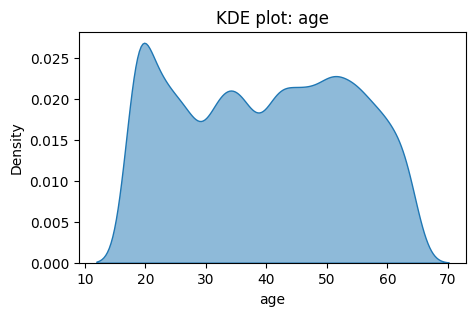

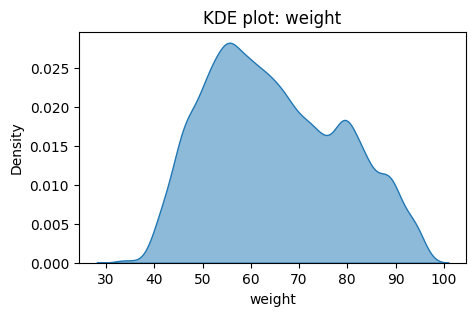

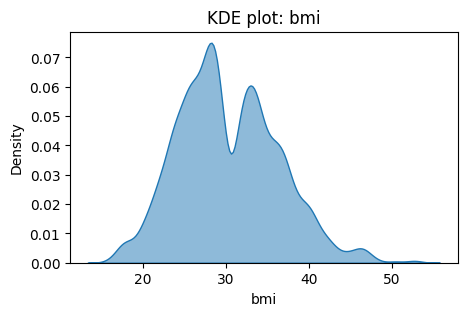

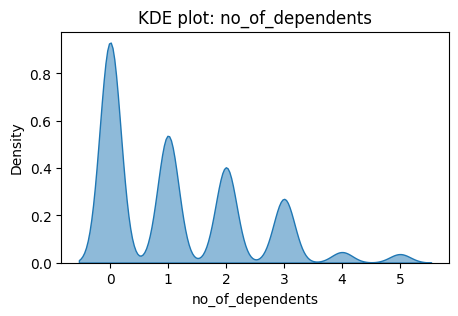

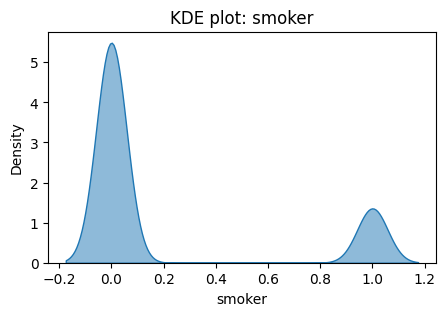

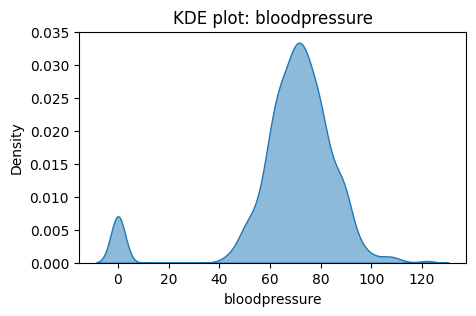

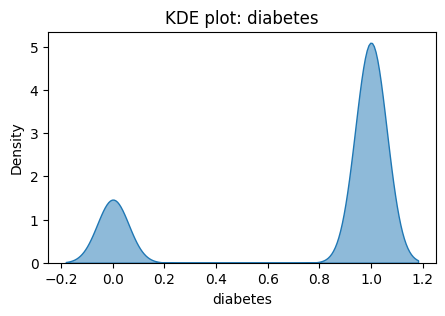

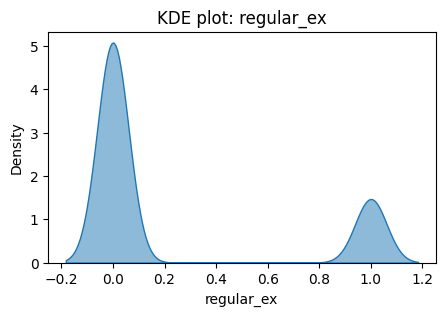

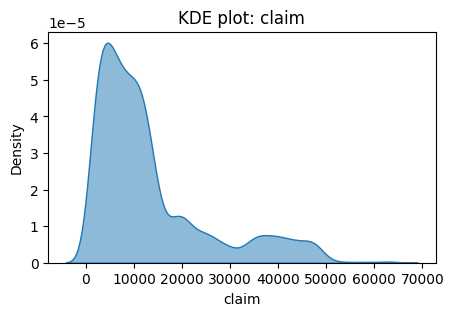

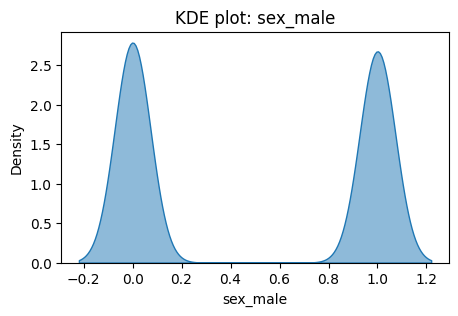

In [14]:
plot_KDE_plot(df_health_demographics_claims)

#### Few Observations
- **Age:** Evenly spread, with most individuals in their 20s.
- **Weight & BMI:** Majority fall within 50-60 kg and a normal BMI range, but some individuals are obese with high BMI values.
- **Dependents:** Most individuals have no dependents, but a significant number have 1 to 5 dependents.
- **Smoking:** The dataset consists mostly of non-smokers, with comparatively fewer smokers.
- **Blood Pressure:** Follows a Gaussian distribution, with a mean around 75. Some values are 0, likely due to missing or unrecorded data.
- **Diabetes:** Majority of individuals are diabetic, with fewer non-diabetics. This might correlate with regular exercise, as most do not exercise regularly, and only a few follow a consistent routine.
- **Gender Distribution:** Equal number of males and females in the dataset.
- **Claims:** Well distributed, with most claims being around 20,000.

Next, I want to see if there is any relationship between hereditary_diseases and job_title.

For now, I will ignore the column 'city' as there are many values in it.

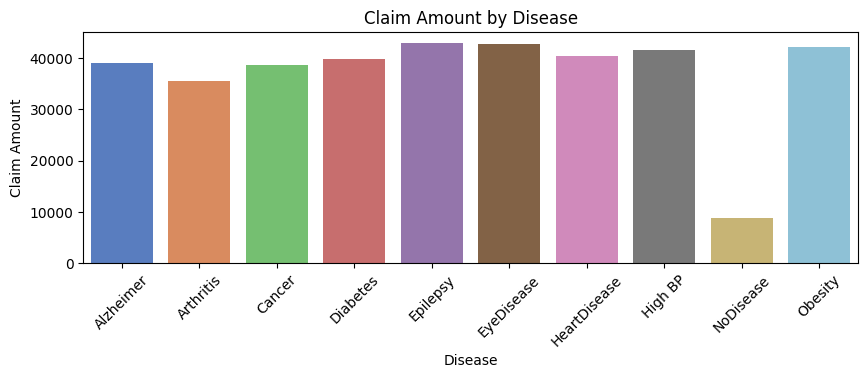

In [15]:
# Groupby disease and calculate the median claim amount and plot it
temp_median_claims = df_health_demographics_claims.groupby('hereditary_diseases')['claim'].median().reset_index()

plt.figure(figsize=(10, 3))
sns.barplot(data=temp_median_claims, x='hereditary_diseases', y='claim', palette='muted')
plt.xlabel("Disease")
plt.ylabel("Claim Amount")
plt.title("Claim Amount by Disease")
plt.xticks(rotation=45)
plt.show()

No Disease has a very low claim amount compared to all other categories, which might indicate that people without a diagnosed disease claim far less insurance (as expected!). 

I will encode and have value = 0 if Hereditary Disease = NoDisease, else, will have value = 1 for others.

In [16]:
df_health_demographics_claims['is_hereditary_diseases'] = df_health_demographics_claims['hereditary_diseases'].apply(lambda x: 0 if x == 'NoDisease' else 1)
df_health_demographics_claims.head()

,age,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim,sex_male,is_hereditary_diseases
0,60.0,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6,1,0
1,49.0,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0,0,0
2,32.0,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2,0,1
3,61.0,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6,0,0
4,19.0,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7,0,0


Next, I will group by job title and see if the claims vary.

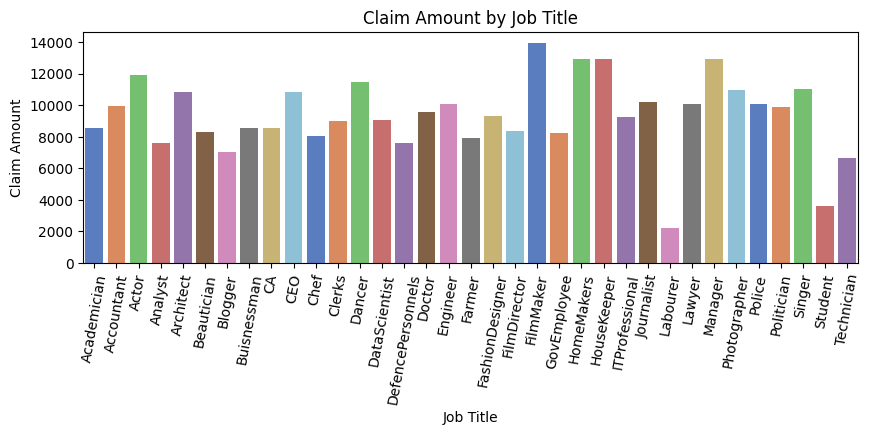

In [17]:
# Groupby job title and calculate the median claim amount and plot it
temp_median_claims = df_health_demographics_claims.groupby('job_title')['claim'].median().reset_index()

plt.figure(figsize=(10, 3))
sns.barplot(data=temp_median_claims, x='job_title', y='claim', palette='muted')
plt.xlabel("Job Title")
plt.ylabel("Claim Amount")
plt.title("Claim Amount by Job Title")
plt.xticks(rotation=80)
plt.show()

#### Observation:
- High-earning professionals like Film Directors, Lawyers, and Government Employees looks like have higher claims due to expensive medical treatments, lifestyle-related health risks or premium insurance plans.

- Physically demanding jobs (e.g., Labourers, Technicians) surprisingly do not have the high claims, which might indicate better workplace insurance coverage or fewer expensive medical treatments.

- Students have very low claim amounts, likely because they are young, healthier, or covered under family plans.

Since there is no other interesting grouping in claim amounts across job titles, I am ignoring this variable for now. 

In [18]:
df_health_demographics_claims.drop(columns=['hereditary_diseases', 'city', 'job_title'], inplace=True)
df_health_demographics_claims.head()

,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim,sex_male,is_hereditary_diseases
0,60.0,64,24.3,1,0,72,0,0,13112.6,1,0
1,49.0,75,22.6,1,0,78,1,1,9567.0,0,0
2,32.0,64,17.8,2,1,88,1,1,32734.2,0,1
3,61.0,53,36.4,1,1,72,1,0,48517.6,0,0
4,19.0,50,20.6,0,0,82,1,0,1731.7,0,0


In [19]:
# plot_pairplot(df_health_demographics_claims, hue='is_hereditary_diseases')

Age-Claims and BMI-Weight (as expected, since BMI includes Weight in it's calculation) somewhat some relationship? Others, maybe doesn't!

Let me see how well each are correlated.

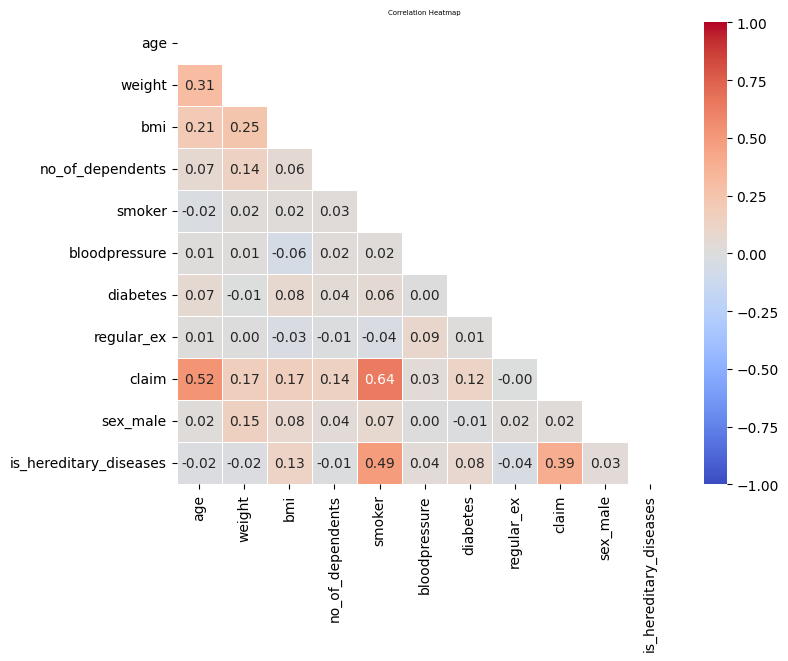

In [20]:
plot_correlation_heatmap(df_health_demographics_claims)

#### Correlations with Claims
- **Strong Positive Correlation:** Smokers (0.64) tend to have higher claim amounts. Age (0.52) also seems to be highly correlated with claim
- **Moderate Positive Correlation:** People with hereditary diseases (0.39) have moderately higher claims.
- **Weak Positive Correlation:** Slight increase in claims with higher weight and BMI (0.17), no_of_dependents (0.14) and diabetes (0.12).
- **Very Weak Correlation:** bloodpressure, regular_ex, and sex show minimal correlation with claims.

Interestingly, there is only a weak relationship between weight and BMI (Spearmann's correlation coefficient = 0.25)!

Now I will check if they are significant enough.

In [ ]:
columns_to_check_significance = ['smoker', 'age', 'is_hereditary_diseases', 'weight', 'bmi', 'no_of_dependents', 'diabetes']
for col in columns_to_check_significance:
    corr, p_value = spearmanr(df_health_demographics_claims[col], df_health_demographics_claims['claim'])
    print(f"\n{col} - claim:")
    if p_value == 0.0:
        log_p_value = np.log10(np.finfo(float).eps)
        print(f"Spearman Correlation: {corr}")
        print(f"P-value is smaller than 10^{log_p_value:.2f}")
    else:
        print(f"Spearman Correlation: {corr}")
        print(f"P-value: {p_value}")


smoker - claim:
Spearman Correlation: 0.6371366943045187
P-value is smaller than 10^-15.65

age - claim:
Spearman Correlation: 0.523837245100115
P-value is smaller than 10^-15.65

is_hereditary_diseases - claim:
Spearman Correlation: 0.3945236588678504
P-value is smaller than 10^-15.65

weight - claim:
Spearman Correlation: 0.16909487239295018
P-value: 1.277518467218224e-96

bmi - claim:
Spearman Correlation: 0.16626192970605433
P-value: 1.9827811095898874e-93

no_of_dependents - claim:
Spearman Correlation: 0.1356264400917613
P-value: 1.6419989290893544e-62

diabetes - claim:
Spearman Correlation: 0.12212333875073396
P-value: 6.130422264468983e-51


Seems like all these relationships are significant enough and indeed are related to 'claim'.

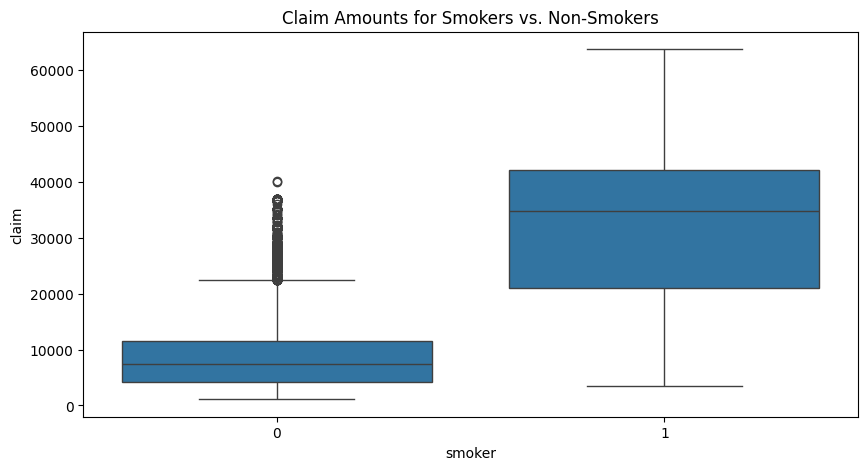

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_health_demographics_claims['smoker'], y=df_health_demographics_claims['claim'])
plt.title("Claim Amounts for Smokers vs. Non-Smokers")
plt.show()

There is a significant difference in the claims received by Smokers vs Non-Smokers. 

Now let me see how age and claims received are related!

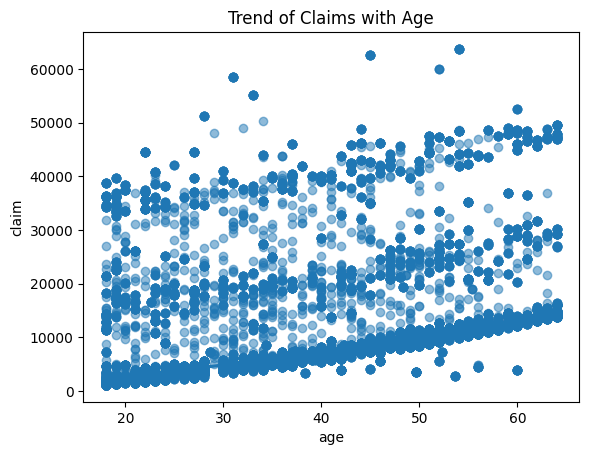

In [ ]:
sns.regplot(x=df_health_demographics_claims['age'], y=df_health_demographics_claims['claim'], scatter_kws={"alpha": 0.5}, lowess=True)
plt.title("Trend of Claims with Age")
plt.show()

- It looks like with increasing age, individuals are filing for more claims. 
- However, there is still a significant variation in claim amounts across all ages - suggesting that claims can be highly variable even within the same age group.
- The minimum claim values appear to increase with age, i.e., younger individuals tend to have lower claim amounts while older individuals might have a higher minimum claim threshold.

Let me now bin (my median) and see if I can visualize differences clearly.


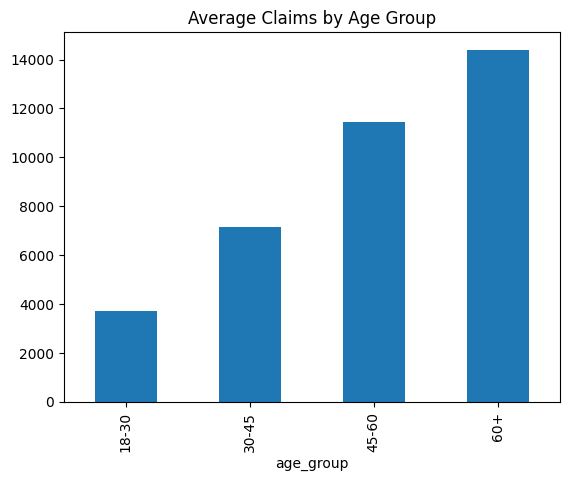

In [ ]:
df_health_demographics_claims['age_group'] = pd.cut(df_health_demographics_claims['age'], bins=[18, 30, 45, 60, 80], labels=['18-30', '30-45', '45-60', '60+'])
df_health_demographics_claims.groupby('age_group')['claim'].median().plot(kind='bar')
plt.title("Median Claims by Age Group")
plt.show()


Definaely there is! Individuls between 18-30 yrs, usually file and receive less than 4000 claims, whereas, it is 4X for 60+yrs individuals.

Let us also observe if there is a significant difference between number of smokers vs non smokers across these age bins and if the ones who dont smoke receive lesser claims.

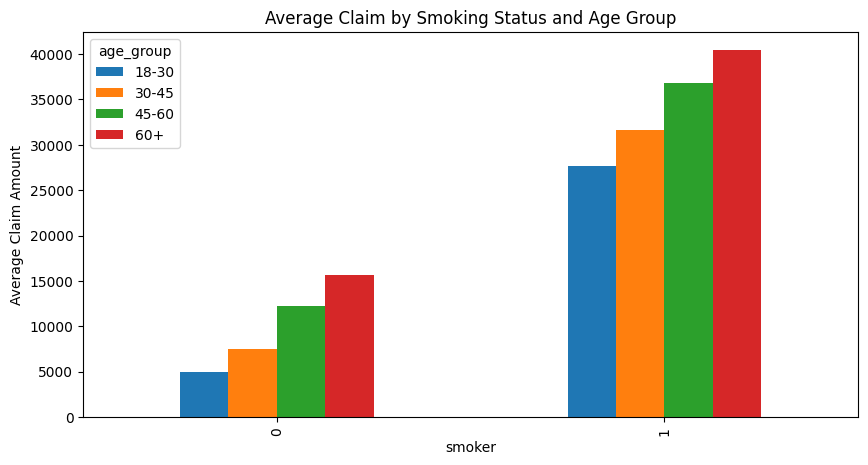

In [ ]:
df_health_demographics_claims.groupby(['smoker', 'age_group'])['claim'].mean().unstack().plot(kind='bar', figsize=(10,5))
plt.title("Median Claim by Smoking Status and Age Group")
plt.ylabel("Median Claim Amount")
plt.show()


Yes! We are right. People who dont smoke file for 2X less claims than those who smnoke. 

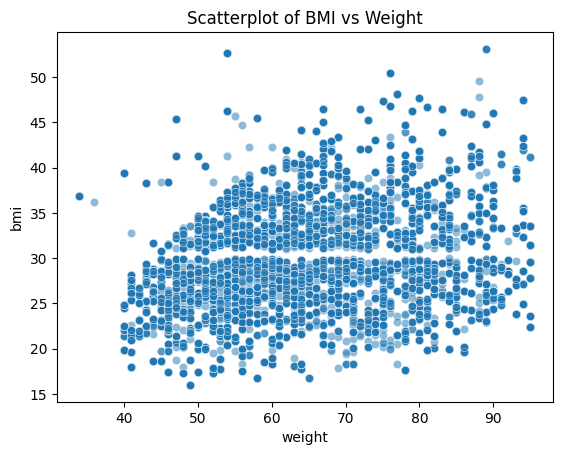

In [ ]:
sns.scatterplot(x=df_health_demographics_claims['weight'], y=df_health_demographics_claims['bmi'], alpha=0.5)
plt.title("Scatterplot of BMI vs Weight")
plt.show()

Since BMI depends on both weight and height, 
BMI = (weight(kg))/(height(m)^2)

Probably, in this case, height is really varying across individuals (BMI values for the same weight can be very different) - hence, we don't have a good correlation/clear trend between weight - and BMI.

### 4.3 Demographics dataset

### 4.4 Demoghraphics Stats Dataset